In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
from tkinter import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('D:\\TITO\\Documents\\BANGKIT\\capstone\\price_prediction\\data\\price.csv')

In [3]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


In [4]:
data.shape

(264, 6)

In [5]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [6]:
data.describe()

,Price,Actual Price
count,264.000000,264.000000
mean,49903.363636,68454.545455
std,59375.759491,69461.411301
min,6000.000000,25000.000000
25%,19200.000000,30000.000000
50%,30200.000000,55000.000000
75%,55250.000000,70000.000000
max,403200.000000,280000.000000


In [7]:
sorted(data['Price'],reverse=True)

[403200,
 336000,
 336000,
 322560,
 280000,
 268800,
 268800,
 268800,
 224000,
 224000,
 215040,
 201600,
 179200,
 168000,
 168000,
 161280,
 140000,
 134400,
 134400,
 115200,
 112000,
 112000,
 100800,
 96000,
 96000,
 92160,
 89600,
 86400,
 86400,
 84000,
 84000,
 84000,
 80640,
 80000,
 79200,
 76800,
 76800,
 76800,
 72000,
 72000,
 72000,
 72000,
 70000,
 69120,
 69120,
 67200,
 67200,
 67200,
 67200,
 66000,
 66000,
 64000,
 64000,
 63360,
 61440,
 60000,
 60000,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 56000,
 56000,
 55000,
 54720,
 53760,
 52800,
 52800,
 52800,
 51200,
 50400,
 48000,
 48000,
 48000,
 48000,
 48000,
 48000,
 46080,
 46080,
 46080,
 45600,
 45600,
 44800,
 44000,
 44000,
 43776,
 43200,
 43200,
 43200,
 43200,
 42240,
 42000,
 42000,
 40320,
 40000,
 39600,
 38400,
 38400,
 38400,
 38400,
 38000,
 36480,
 36480,
 36480,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 35200,
 35000,
 34560,
 34560,
 34560,
 

In [8]:
# data = data[~(data['Price']>=6000.0) & (data['Price']<=403200.0)]
# data.shape
# data.head()

# Data mapping humu humu~

In [9]:
data['Fish Species'].unique()
data['Fish Species'] = data['Fish Species'].map({'Bawal Hitam':0,'Bawal Putih':1,'Cakalang':2,
                                                 "Kakap Merah":3,"Kembung":4,"Kerapu":5,
                                                 "Kuwe":6,"Makerel":7,"Salmon":8,
                                                 "Tenggiri":9,"Tongkol":10})

In [10]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'C':0,'B':1,'A':2})

In [11]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':1,'Unsustainable':0})


In [12]:
data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':3,'Netting':2, 'Spearfishing':0, 'Fishing Hook':1})

# Data Normalization humu humu~

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
data['Actual Price'] = scaler.fit_transform(data[['Actual Price']])
data['Price'] = scaler2.fit_transform(data[['Price']])

In [14]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.075529,1,3,1,0.019608
1,1,0.166163,1,3,1,0.137255
2,2,0.060423,1,3,1,0.000000
3,3,0.151057,1,3,1,0.117647
4,4,0.060423,1,3,1,0.000000


In [15]:
print(scaler.inverse_transform(data[['Actual Price']]))

[[ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]

In [16]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.075529,1,3,1,0.019608
1,1,0.166163,1,3,1,0.137255
2,2,0.060423,1,3,1,0.000000
3,3,0.151057,1,3,1,0.117647
4,4,0.060423,1,3,1,0.000000
...,...,...,...,...,...,...
259,6,0.041289,0,1,0,0.176471
260,7,0.009063,0,1,0,0.019608
261,8,0.210473,0,1,0,1.000000
262,9,0.033233,0,1,0,0.137255


# Feature and label split humu humu~

In [17]:
X = data.drop(['Price', 'Fish Species'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Grade  Catching Method  Sustainability  Actual Price
0      1                3               1      0.019608
1      1                3               1      0.137255
2      1                3               1      0.000000
3      1                3               1      0.117647
4      1                3               1      0.000000
0    0.075529
1    0.166163
2    0.060423
3    0.151057
4    0.060423
Name: Price, dtype: float64


# Train test split humu humu~

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
import tensorflow as tf

# Model 1 humu humu~

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(1, activation='linear')
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [22]:
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 28ms/step - loss: 0.6525 - mse: 0.6525 - val_loss: 0.5297 - val_mse: 0.5297
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4359 - mse: 0.4359 - val_loss: 0.3379 - val_mse: 0.3379
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.2795 - mse: 0.2795 - val_loss: 0.2194 - val_mse: 0.2194
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1758 - mse: 0.1758 - val_loss: 0.1537 - val_mse: 0.1537
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1213 - mse: 0.1213 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0972 - val_mse: 0.0972
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0544 - mse: 0.05

# Model 2 humu humu~

In [23]:
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [24]:
model_complex.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [25]:
history2 = model_complex.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100


7/7 [==============================] - 1s 44ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0074 - mse: 0.0074 - val_los

# Model 3 humu humu~

In [26]:
model_that_she_not_worry_about = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Reshape((2, 10)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1, activation='linear')
])

In [27]:
model_that_she_not_worry_about.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [28]:
history3 = model_that_she_not_worry_about.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100


7/7 [==============================] - 4s 127ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 8/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0130 - mse: 0.0130 - val_lo

# Model 4 humu humu~

In [29]:
model_using_huber = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(25, activation='relu'),  # Add an additional dense layer to match the expected output shape
    tf.keras.layers.Reshape((5, 5)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1)
])

In [30]:
model_using_huber.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics=['mse'])

In [31]:
history4 = model_using_huber.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 124ms/step - loss: 0.0140 - mse: 0.0279 - val_loss: 0.0281 - val_mse: 0.0561
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0085 - mse: 0.0170 - val_loss: 0.0215 - val_mse: 0.0430
Epoch 3/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0081 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0406
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0079 - mse: 0.0158 - val_loss: 0.0207 - val_mse: 0.0413
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0073 - mse: 0.0147 - val_loss: 0.0217 - val_mse: 0.0433
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0071 - mse: 0.0143 - val_loss: 0.0218 - val_mse: 0.0437
Epoch 7/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0070 - mse: 0.0139 - val_loss: 0.0210 - val_mse: 0.0420
Epoch 8/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0067 - mse: 0.0

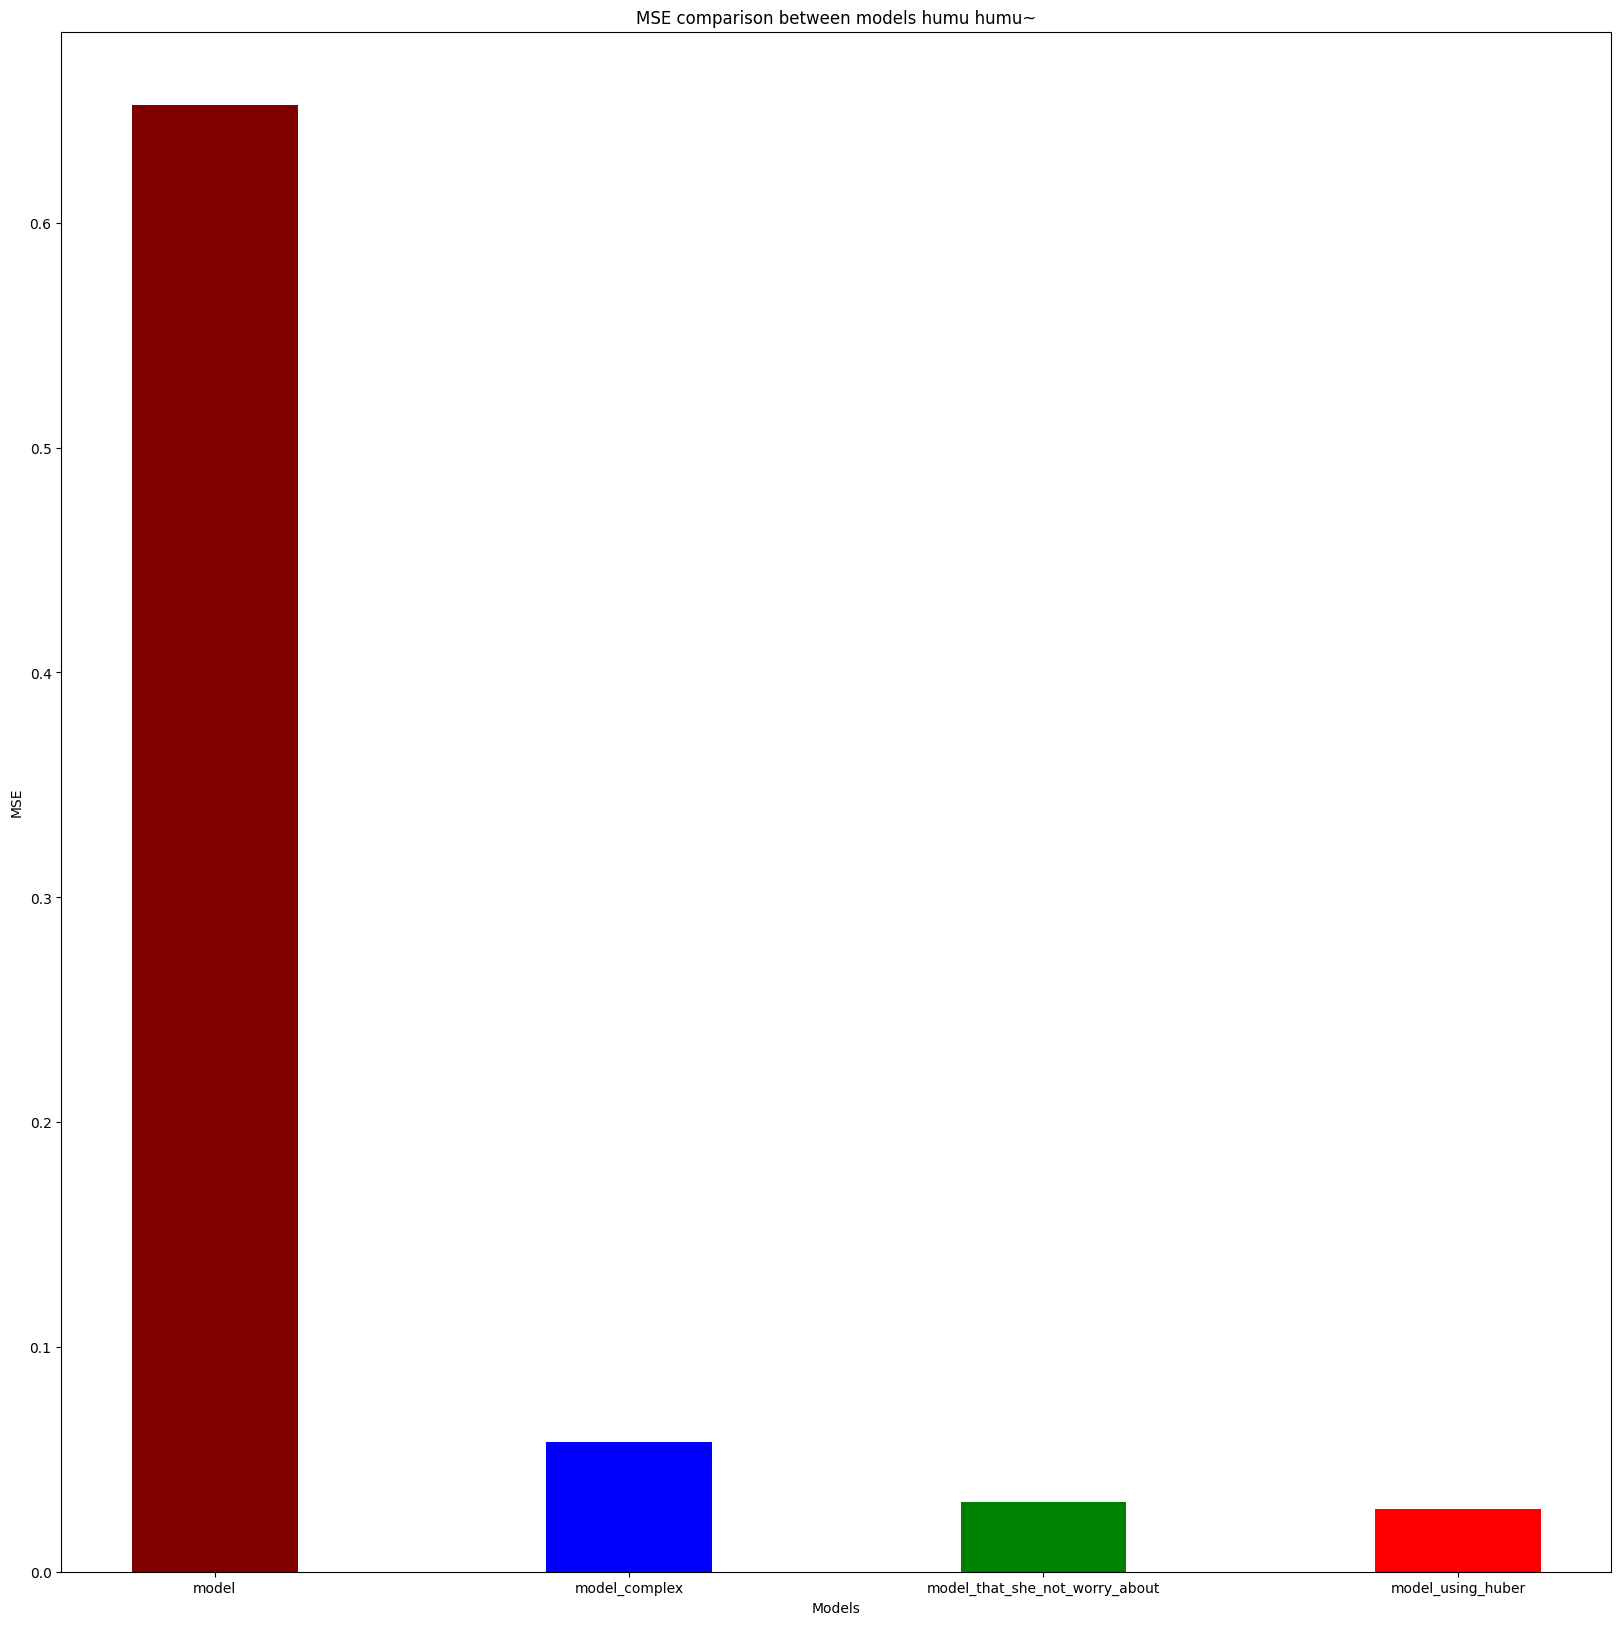

In [32]:
import numpy as np
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (20, 20))

# creating the bar plot
plt.bar("model",history.history['mse'], color ='maroon', width = 0.4)
plt.bar("model_complex",history2.history['mse'], color ='blue', width = 0.4)
plt.bar("model_that_she_not_worry_about",history3.history['mse'], color ='green', width = 0.4)
plt.bar("model_using_huber",model_using_huber.history.history['mse'], color ='red', width = 0.4)

plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE comparison between models humu humu~")
plt.show()


(0.0, 50.0)

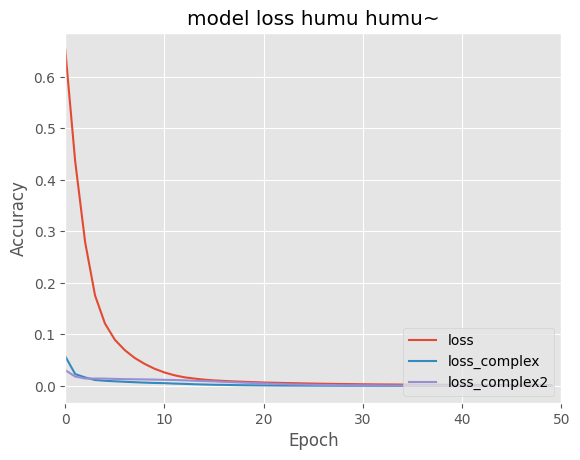

In [33]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('model loss humu humu~')
plt.plot(history.history['mse'][:50], label='loss')
plt.plot(history2.history['mse'][:50], label='loss_complex')
plt.plot(history3.history['mse'][:50], label='loss_complex2')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 50)


In [34]:
y_pred1 = model.predict(X_test)
score1 = metrics.r2_score(y_test,y_pred1)
y_pred2 = model_complex.predict(X_test)
score2 = metrics.r2_score(y_test,y_pred2)
y_pred3 = model_that_she_not_worry_about.predict(X_test)
score3 = metrics.r2_score(y_test,y_pred3)
y_pred4 = model_using_huber.predict(X_test)
score4 = metrics.r2_score(y_test,y_pred4)
print('model1 : ',score1)
print('model2 : ',score2)
print('model3 : ',score3)
print('model4 : ',score4)

model1 :  0.9440130803070814
model2 :  0.9909958253257222
model3 :  0.9849093095990017
model4 :  0.9835167216411432


In [35]:
print(X.shape)
print(y.shape)

(264, 4)
(264,)


In [36]:
arr = scaler.inverse_transform(data[['Actual Price']])
arr2 = []
for array in arr :
    arr2.append(array[0])
    
print(arr2)

[30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0,

In [37]:
arr_price = scaler2.inverse_transform(data[['Price']])
arr_price2 = []
for array in arr_price :
    arr_price2.append(array[0])
print(arr_price2)

[36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 83999.99999999999, 36000.0, 336000.0, 72000.0, 45600.0, 43200.0, 86399.99999999999, 36000.0, 79200.0, 36000.0, 115200.00000000001, 100800.0, 43200.0, 403200.0, 86399.99999999999, 54720.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 30000.0, 59999.999999999985, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 59999.999999999985, 38000.0, 36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 83999.99999999999, 36000.0, 336000.0, 72000.0, 45600.0, 15000.0, 30000.0, 12500.0, 27500.0, 12500.0, 40000.0, 35000.0, 15000.0, 140000.0, 30000.0, 19000.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 21600.0, 43200.0, 18000.0, 39600.0, 18000.0, 57600.00000000001, 50400.0, 21600.0, 201600.0, 43200.0, 27360.0, 9000.0, 18000.0, 7500.0, 16500.0, 7500.0, 24000.0, 21000.0, 9000.0, 83999.99999999999, 18000.0, 11400.0, 24000.0, 4

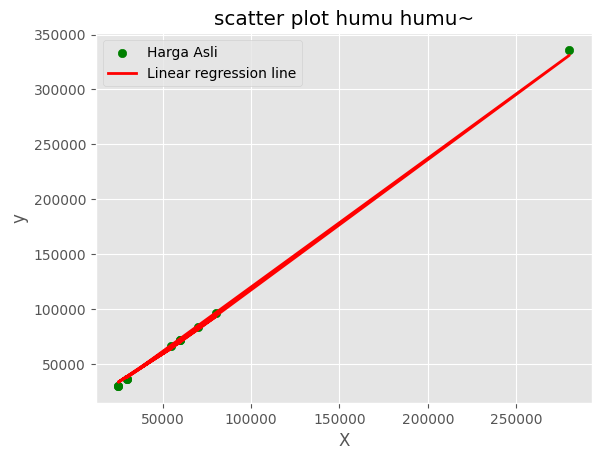

In [38]:
xt = X.T
y_pred_humu = model_that_she_not_worry_about.predict(X)
plt.scatter(arr2[:10], arr_price2[:10], color='green', label='Harga Asli')
plt.plot(arr2[:10], scaler2.inverse_transform(y_pred_humu[:10]), color='red', linewidth=2, label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('scatter plot humu humu~')
plt.show()

In [39]:
model.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor.h5')

In [40]:
model_complex.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex.h5')

In [41]:
model_that_she_not_worry_about.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex_lstm.h5')

In [42]:
model_using_huber.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex_lstm_huber.h5')

In [43]:
import numpy as np
import math

In [44]:
# Bulatkan ke kelipatan ribuan humu humu~
def bulatkan_ke_kelipatan(angka, kelipatan):
    ke_atas = kelipatan * ((angka + kelipatan - 1) // kelipatan)
    ke_bawah = kelipatan * (angka // kelipatan)

    if abs(angka - ke_atas) < abs(angka - ke_bawah):
        return ke_atas
    else:
        return ke_bawah

In [45]:
def predict_price(data, model):
    prediction = model.predict(data)
    prediction = scaler2.inverse_transform(prediction)
    prediction_float = prediction.item()
    rounded_value = bulatkan_ke_kelipatan(round(prediction_float, 0),1000)
    
    return rounded_value

In [46]:
# mapping sorted from 0 to 4 guide
# Grade = C,B,A
# Catching method = Spearfishing, Fishing Hook, Netting, Farmed
# Sustainability = Unsustainable, Moderately sustainable
data_new = pd.DataFrame({
    'Grade':2,
    'Catching Method':3,
    'Sustainability':1,
    'Actual Price' : 30000

},index=[0])

if data_new['Grade'].iloc[0] == 0 or data_new['Actual Price'].iloc[0] == 0:
    result_array = np.array([0])
    float_number = float(result_array[0])
    price = float_number
else:
    data_new['Actual Price'] = scaler.transform(data_new[['Actual Price']])
    # price1 = predict_price(data_new,model)
    price2 = predict_price(data_new,model_complex)
    price3 = predict_price(data_new,model_that_she_not_worry_about)
    price4 = predict_price(data_new,model_using_huber)
    average_price = bulatkan_ke_kelipatan((price2 + price3 + price4)/3, 1000)
    result_array = np.array([price2,price3, price4], dtype=int)
    
    
    
print(result_array)
print(average_price)

[47000 50000 45000]
47000.0
